<a href="https://colab.research.google.com/github/warisaaom/KKU_Data_Mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Generate Data

เรียกใช้คำสั่ง make_blobs เพื่อสร้างชุดข้อมูล

In [2]:
from sklearn.datasets import make_blobs

สร้างชุดข้อมูลจำนวน 300 ตัว มี3 กลุ่ม 2 มิติ

In [3]:
X,y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

เรียกดูจำนวนข้อมูล

In [4]:
X.shape

(300, 2)

เรียกใช้คำสั่ง plot กราฟ
จากนั้น plot กราฟออกมาดู

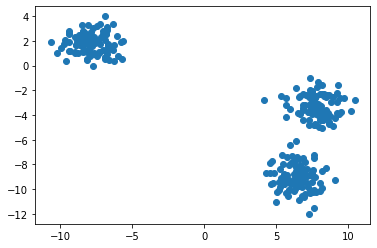

In [5]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##import

เรียกใช้คำสั่ง KMeans เพื่อสร้างโมเดล

In [6]:
from sklearn.cluster import KMeans

##Define

กำหนดค่าในโมเดล KMean ให้แบ่งข้อมูลออกเป็น 5 กลุ่ม

In [7]:
KMclust = KMeans(n_clusters=5)

##Train

Train โมเดล

In [8]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

ทำนายการแบ่งกลุ่มและ plot กราฟ Scatter เพื่อดูการแบ่งกลุ่ม

In [9]:
label = KMclust.predict(X)

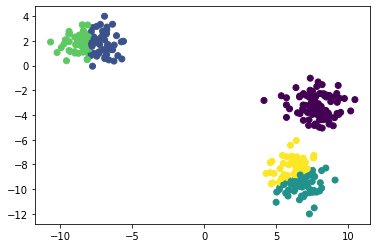

In [10]:
plt.scatter(X[:, 0],X[:, 1], c=label)

##Color quantization (application of kmean)

เชื่อม Colab กับ drive ที่ต้องการ

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive'

In [ ]:
import cv2
import os

เรียกดูค่าสีในรูปที่ทำการ join เข้ามา

In [ ]:
img = cv2.imread(os.path.join(path,'beautiful-mandrill-portrait-closeup-baboon-260nw-1242657010.webp'))

In [ ]:
img

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [ ]:
RGB_img.shape

##Coun unique colors

In [ ]:
import numpy as np

In [ ]:
np.unique(RGB_img).shape

##Use K-mwan to reduce color from 256 colors to B colors

กำหนดให้โมเดล KMean แบ่งกลุ่มออกเป็น 8 กลุ่มสี

In [ ]:
#Define
myQuantize = KMeans(n_clusters=8)



เรียกดูค่าสีของภาพที่joinเข้ามา

In [ ]:
img_row = np.reshape(RGB_img,(280*320,3))
img_row

Train โมเดล

In [ ]:
#Train
myQuantize.fit(img_row)

Testการทำนายค่า

In [ ]:
#Predict
res = myQuantize.predict(img_row)

In [ ]:
res

##Get cluster centers

In [ ]:
Clust_cen = myQuantize.cluster_centers_
Clust_cen

##Map color name back to image

Get cluster centers

In [1]:
clus_cen = myQuantize.cluster_centers_
clus_cen

NameError: ignored

In [ ]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

วนลูปเพื่อเก็บค่าสีไว้ในตัวแปร new_img แบบ Array